# Hybrid Image and Fourier Transforms

In [ ]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Helper Functions

import os

def vis_hybrid_image(hybrid_image):
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  num_colors = hybrid_image.shape[2] # counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2, scales):
      # add padding
      output = np.concatenate((output, np.ones((original_height, padding, num_colors), dtype=int)), axis=1)      
      # dowsample image;
      width = int(cur_image.shape[1] * scale_factor)
      height = int(cur_image.shape[0] * scale_factor)
      dim = (width, height)
      cur_image = cv2.resize(cur_image, dim, interpolation = cv2.INTER_LINEAR)
      # pad the top and append to the output
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors))*255, cur_image), axis=0)
      output = np.concatenate((output, tmp), axis=1)
  
  output = (output).astype(np.uint8)
  return output

def read_image(image_path):
  # YOUR CODE HERE
  image = cv2.imread(image_path)
  return image

def gaussian_2D_filter(size, cutoff_frequency):
  # YOUR CODE HERE
  ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
  gauss = np.exp(-0.5 * np.square(ax) / np.square(cutoff_frequency))
  filter = np.outer(gauss, gauss)
  return filter / np.sum(filter)

def imgfilter(image, filter):
  # YOUR CODE HERE
  # filtered_img = cv2.sepFilter2D(image,-1,filter,filter)
  filtered_img = cv2.filter2D(image, -1, filter)
  return filtered_img

def log_mag_FFT(image):
  img = cv2.cvtColor(np.uint8(image), cv2.COLOR_BGR2GRAY)
  # output = np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  output = 20*np.log(np.abs(fshift))
  return normalize_img(output, 1.0, 0.0)

def normalize_img(img, max, min):
  max_val = np.max(img)
  min_val = np.min(img)
  img = ((img - min_val)/(max_val-min_val))*max + min
  return img

def matplotlib_conversion(img):
  img = np.uint8(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
To: /content/hybrid_pyramid_input.zip
100% 2.19M/2.19M [00:00<00:00, 151MB/s]
Archive:  /content/hybrid_pyramid_input.zip
   creating: /content/data/
  inflating: /content/data/Afghan_girl_before.jpg  
  inflating: /content/data/motorcycle.bmp  
  inflating: /content/data/cat.bmp   
  inflating: /content/data/makeup_before.jpg  
  inflating: /content/data/fish.bmp  
  inflating: /content/data/bicycle.bmp  
  inflating: /content/data/makeup_after.jpg  
  inflating: /content/data/plane.bmp  
  inflating: /content/data/marilyn.bmp  
  inflating: /content/data/dog.bmp   
  inflating: /content/data/Afghan_girl_after.jpg  
  inflating: /content/data/submarine.bmp  
  inflating: /content/data/bird.bmp  
  inflating: /content/data/einstein.bmp  


## Code

In [ ]:
# Helper Functions

import os

def vis_hybrid_image(hybrid_image):
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  num_colors = hybrid_image.shape[2] # counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2, scales):
      # add padding
      output = np.concatenate((output, np.ones((original_height, padding, num_colors), dtype=int)), axis=1)      
      # dowsample image;
      width = int(cur_image.shape[1] * scale_factor)
      height = int(cur_image.shape[0] * scale_factor)
      dim = (width, height)
      cur_image = cv2.resize(cur_image, dim, interpolation = cv2.INTER_LINEAR)
      # pad the top and append to the output
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors))*255, cur_image), axis=0)
      output = np.concatenate((output, tmp), axis=1)
  
  output = (output).astype(np.uint8)
  return output

def read_image(image_path):
  # YOUR CODE HERE
  image = cv2.imread(image_path)
  return image

def gaussian_2D_filter(size, cutoff_frequency):
  # YOUR CODE HERE
  ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
  gauss = np.exp(-0.5 * np.square(ax) / np.square(cutoff_frequency))
  filter = np.outer(gauss, gauss)
  return filter / np.sum(filter)

def imgfilter(image, filter):
  # YOUR CODE HERE
  # filtered_img = cv2.sepFilter2D(image,-1,filter,filter)
  filtered_img = cv2.filter2D(image, -1, filter)
  return filtered_img

def log_mag_FFT(image):
  img = cv2.cvtColor(np.uint8(image), cv2.COLOR_BGR2GRAY)
  # output = np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  output = 20*np.log(np.abs(fshift))
  return normalize_img(output, 1.0, 0.0)

def normalize_img(img, max, min):
  max_val = np.max(img)
  min_val = np.min(img)
  img = ((img - min_val)/(max_val-min_val))*max + min
  return img

def matplotlib_conversion(img):
  img = np.uint8(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

In [ ]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Pair 1:

Visualizing the Gaussian Filter



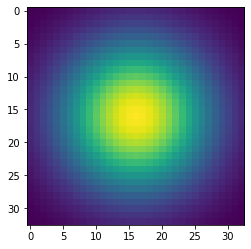

In [ ]:
image_path1 = '/content/data/bicycle.bmp'
image_path2 = '/content/data/motorcycle.bmp'

image_1 = read_image(image_path1)
image_2 = read_image(image_path2)

image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]), interpolation = cv2.INTER_NEAREST)

# YOUR CODE HERE: TUNE cutoff_frequency
lowf_cutoff_frequency = 8
lowf_filter_size = lowf_cutoff_frequency*4+1

"""cutoff_frequency is the standard deviation, in pixels, of the 
Gaussian blur that will remove the high frequencies from one image (image_1) and 
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""

print("Visualizing the Gaussian Filter\n")
lowf_filter = gaussian_2D_filter(lowf_filter_size, lowf_cutoff_frequency)
plt.imshow(lowf_filter)

Visualizing the images:



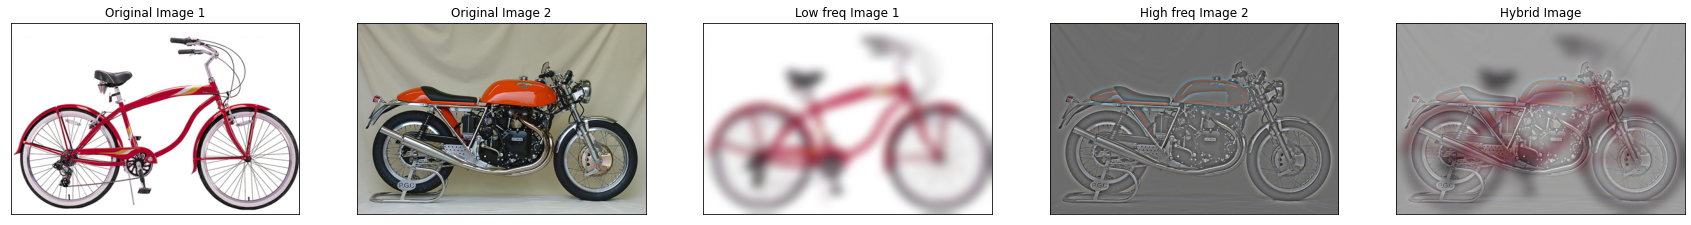

In [ ]:
"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

# YOUR CODE HERE.
blurred_image1 = np.double(imgfilter(image_1, filter=lowf_filter))

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""

# YOUR CODE HERE
highf_cutoff_frequency = 4
highf_filter_size = highf_cutoff_frequency*4+1
highf_filter = gaussian_2D_filter(highf_filter_size, highf_cutoff_frequency)

low_frequencies_img2 = imgfilter(image_2, filter=highf_filter)

high_frequencies_img2 = np.double(image_2) - np.double(low_frequencies_img2)

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""
# YOUR CODE HERE
hybrid_image= np.double(high_frequencies_img2) + np.double(blurred_image1)
# Normalizing it to (0,255)
hybrid_image = normalize_img(hybrid_image, 255, 0)

"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
# YOUR CODE HERE.
print("Visualizing the images:\n")
fig = plt.figure(figsize=(30, 10))

plt.subplot(151),plt.imshow(matplotlib_conversion(image_1))
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(matplotlib_conversion(image_2))
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(matplotlib_conversion(blurred_image1))
plt.title('Low freq Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(matplotlib_conversion(normalize_img(high_frequencies_img2,255,0)))
plt.title('High freq Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(matplotlib_conversion(hybrid_image))
plt.title('Hybrid Image'), plt.xticks([]), plt.yticks([])
plt.show()

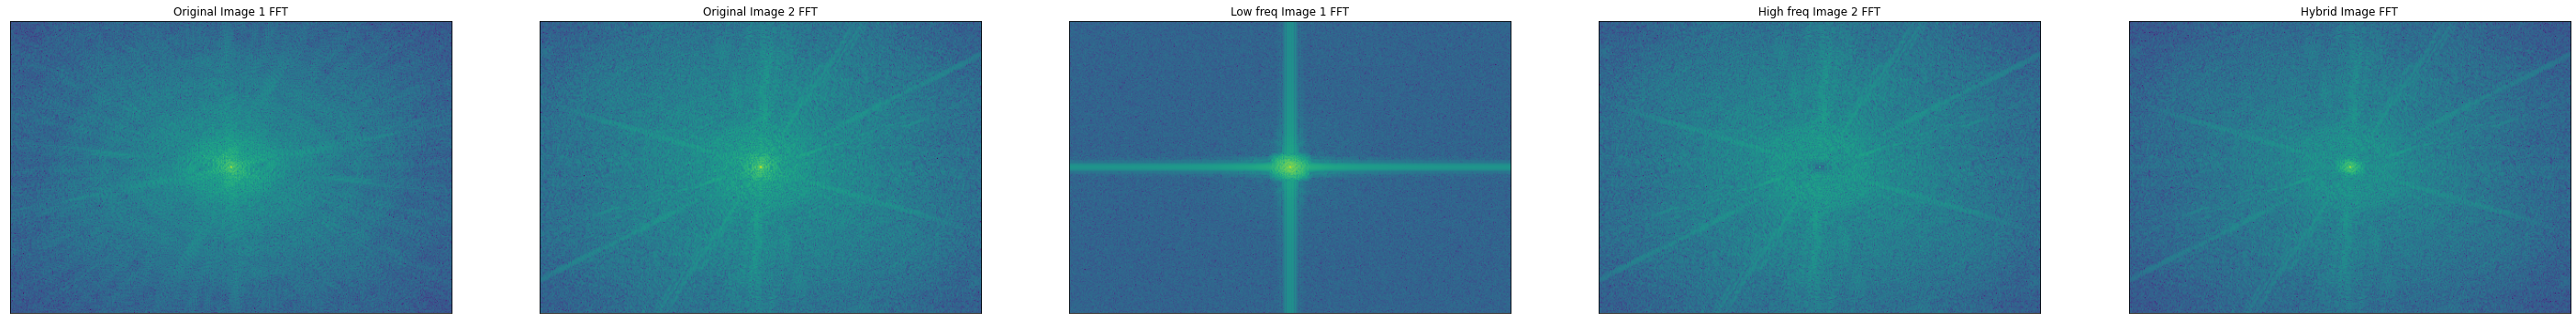

In [ ]:
"""Secondly, also visualize log magnitude of Fourier Transform of the above.
HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""
# YOUR CODE HERE.
fig = plt.figure(figsize=(50, 20))

plt.subplot(151),plt.imshow(log_mag_FFT(image_1))
plt.title('Original Image 1 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(log_mag_FFT(image_2))
plt.title('Original Image 2 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(log_mag_FFT(blurred_image1))
plt.title('Low freq Image 1 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(log_mag_FFT(normalize_img(high_frequencies_img2,255,0)))
plt.title('High freq Image 2 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(log_mag_FFT(hybrid_image))
plt.title('Hybrid Image FFT'), plt.xticks([]), plt.yticks([])
plt.show()

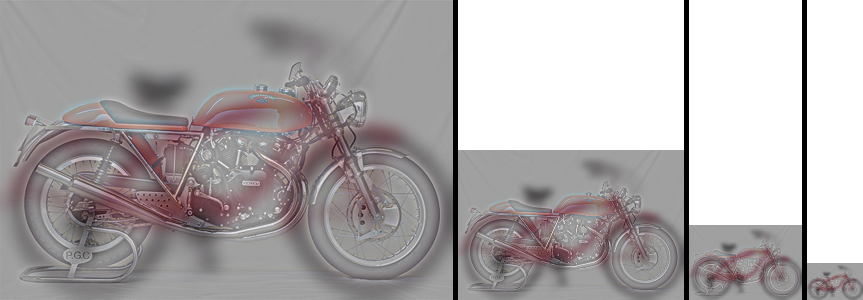

In [ ]:
"""Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
Lastly, save all your outputs."""
# YOUR CODE HERE.
# hybrid_vis = np.reshape(hybrid_image, (hybrid_image.shape[0], hybrid_image.shape[1], 1))
# print(hybrid_vis.shape)
cv2_imshow(vis_hybrid_image(hybrid_image))

#Pair 2:

Visualizing the Gaussian Filter



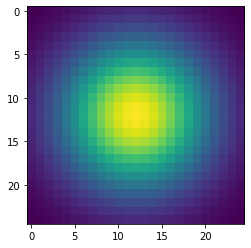

In [ ]:
image_path1 = '/content/data/cat.bmp'
image_path2 = '/content/data/dog.bmp'

image_1 = read_image(image_path1)
image_2 = read_image(image_path2)

image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]), interpolation = cv2.INTER_LINEAR)

# image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
# image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

# YOUR CODE HERE: TUNE cutoff_frequency
lowf_cutoff_frequency = 6
lowf_filter_size = lowf_cutoff_frequency*4+1

"""cutoff_frequency is the standard deviation, in pixels, of the 
Gaussian blur that will remove the high frequencies from one image (image_1) and 
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""

print("Visualizing the Gaussian Filter\n")
lowf_filter = gaussian_2D_filter(lowf_filter_size, lowf_cutoff_frequency)
plt.imshow(lowf_filter)

Visualizing the images:



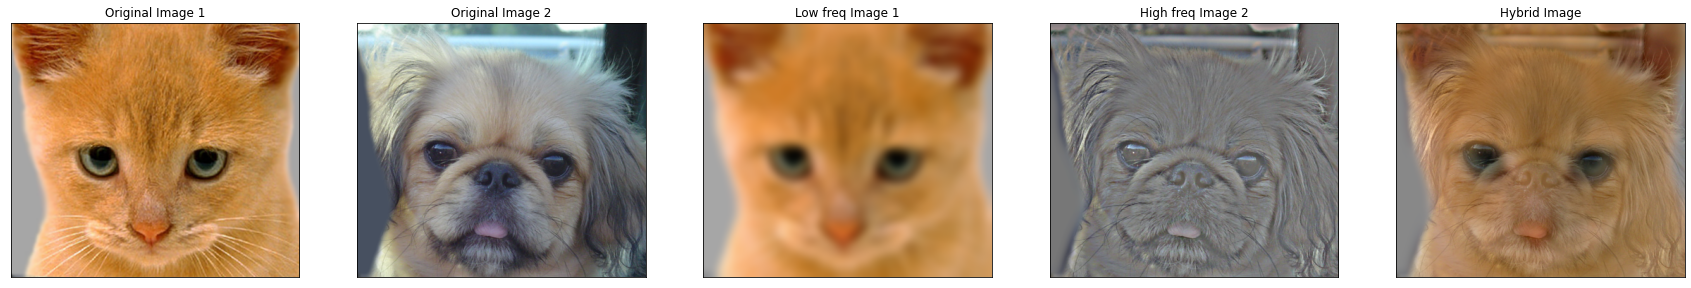

In [ ]:
"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

# YOUR CODE HERE.
blurred_image1 = np.double(imgfilter(image_1, filter=lowf_filter))

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""

# YOUR CODE HERE
highf_cutoff_frequency = 8
highf_filter_size = highf_cutoff_frequency*4+1
highf_filter = gaussian_2D_filter(highf_filter_size, highf_cutoff_frequency)

low_frequencies_img2 = imgfilter(image_2, filter=highf_filter)

high_frequencies_img2 = np.double(image_2) - np.double(low_frequencies_img2)

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""
# YOUR CODE HERE
hybrid_image= np.double(high_frequencies_img2) + np.double(blurred_image1)
# Normalizing it to (0,255)
hybrid_image = normalize_img(hybrid_image, 255, 0)

"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
# YOUR CODE HERE.
print("Visualizing the images:\n")
fig = plt.figure(figsize=(30, 10))

plt.subplot(151),plt.imshow(matplotlib_conversion(image_1))
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(matplotlib_conversion(image_2))
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(matplotlib_conversion(blurred_image1))
plt.title('Low freq Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(matplotlib_conversion(normalize_img(high_frequencies_img2,255,0)))
plt.title('High freq Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(matplotlib_conversion(hybrid_image))
plt.title('Hybrid Image'), plt.xticks([]), plt.yticks([])
plt.show()

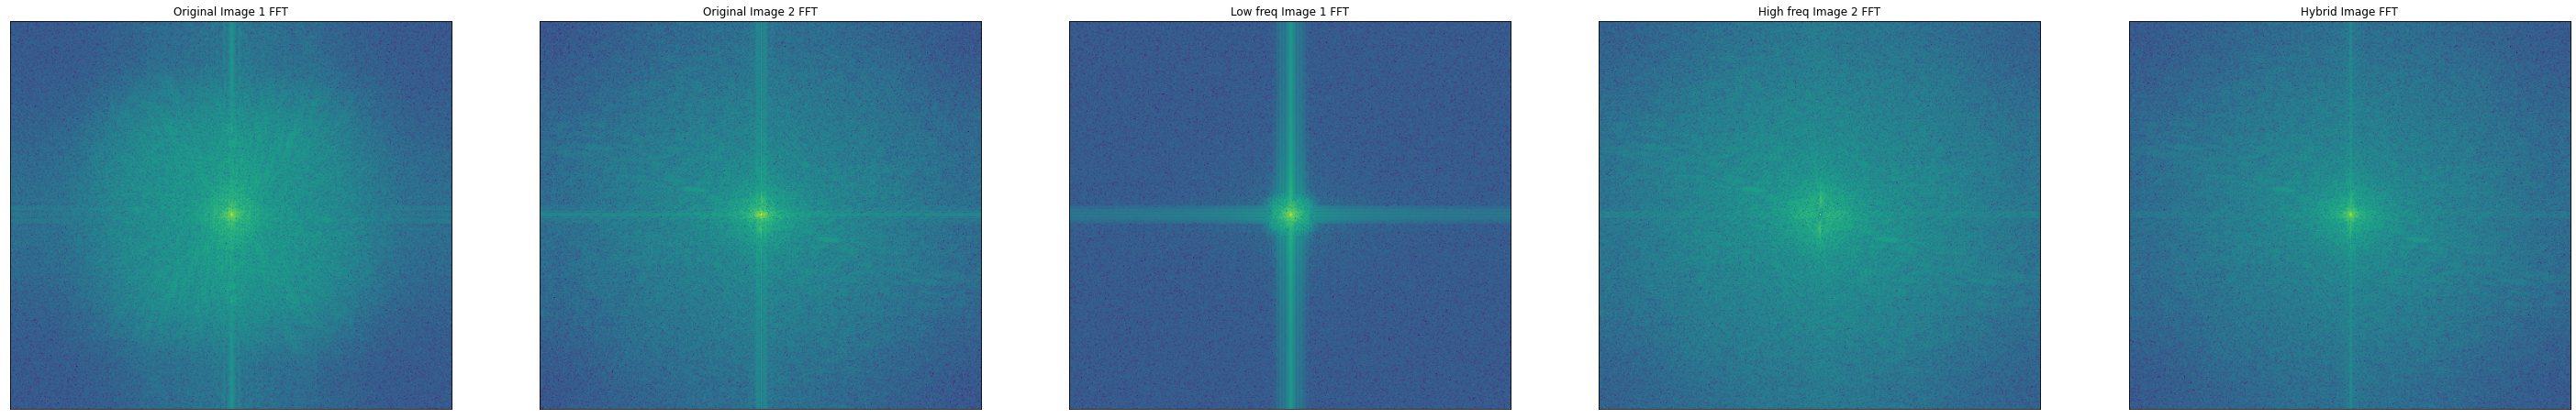

In [ ]:
"""Secondly, also visualize log magnitude of Fourier Transform of the above.
HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""
# YOUR CODE HERE.
fig = plt.figure(figsize=(50, 20))

plt.subplot(151),plt.imshow(log_mag_FFT(image_1))
plt.title('Original Image 1 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(log_mag_FFT(image_2))
plt.title('Original Image 2 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(log_mag_FFT(blurred_image1))
plt.title('Low freq Image 1 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(log_mag_FFT(normalize_img(high_frequencies_img2,255,0)))
plt.title('High freq Image 2 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(log_mag_FFT(hybrid_image))
plt.title('Hybrid Image FFT'), plt.xticks([]), plt.yticks([])
plt.show()

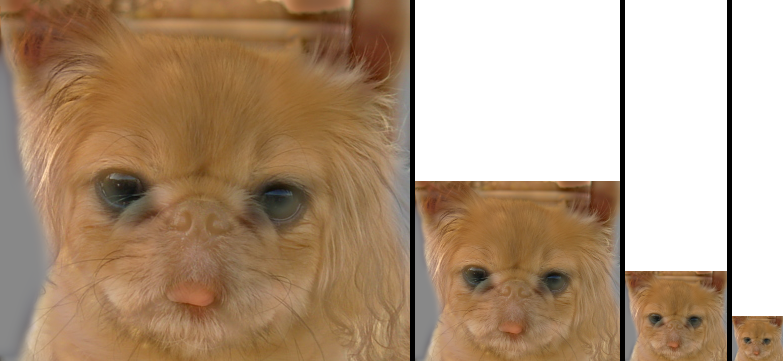

In [ ]:
"""Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
Lastly, save all your outputs."""
# YOUR CODE HERE.
# hybrid_vis = np.reshape(hybrid_image, (hybrid_image.shape[0], hybrid_image.shape[1], 1))
# print(hybrid_vis.shape)
cv2_imshow(vis_hybrid_image(hybrid_image))

#Pair 3

Visualizing the Gaussian Filter



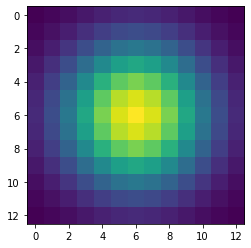

In [ ]:
image_path1 = '/content/data/marilyn.bmp'
image_path2 = '/content/data/einstein.bmp'

image_1 = read_image(image_path1)
image_2 = read_image(image_path2)

image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]), interpolation = cv2.INTER_NEAREST)

# image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
# image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

# YOUR CODE HERE: TUNE cutoff_frequency
lowf_cutoff_frequency = 3
lowf_filter_size = lowf_cutoff_frequency*4+1

"""cutoff_frequency is the standard deviation, in pixels, of the 
Gaussian blur that will remove the high frequencies from one image (image_1) and 
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""

print("Visualizing the Gaussian Filter\n")
lowf_filter = gaussian_2D_filter(lowf_filter_size, lowf_cutoff_frequency)
plt.imshow(lowf_filter)

Visualizing the images:



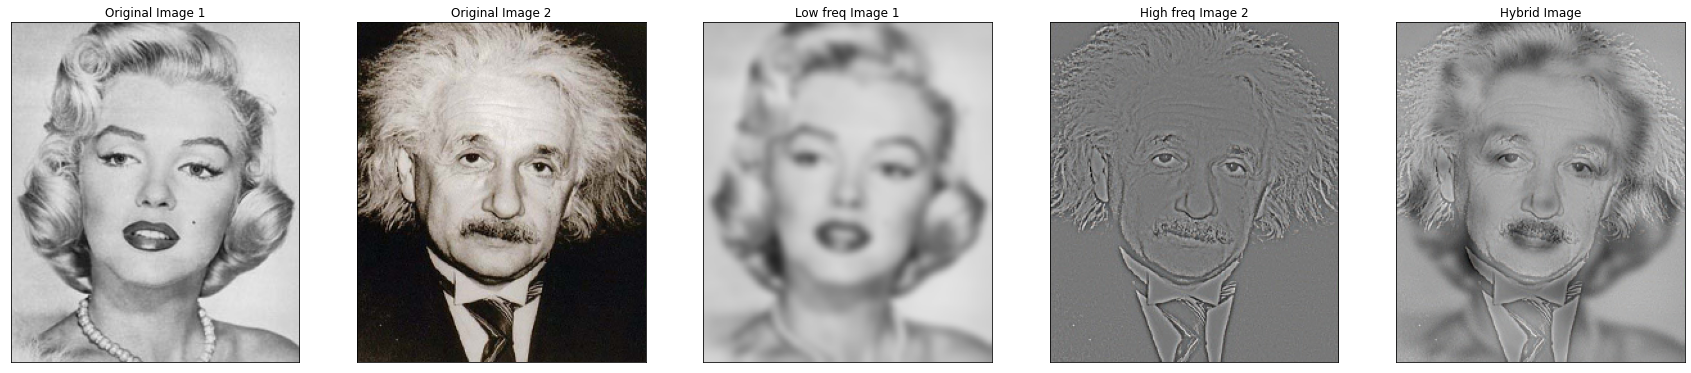

In [ ]:
"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

# YOUR CODE HERE.
blurred_image1 = np.double(imgfilter(image_1, filter=lowf_filter))

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""

# YOUR CODE HERE
highf_cutoff_frequency = 2
highf_filter_size = highf_cutoff_frequency*4+1
highf_filter = gaussian_2D_filter(highf_filter_size, highf_cutoff_frequency)

low_frequencies_img2 = imgfilter(image_2, filter=highf_filter)

high_frequencies_img2 = np.double(image_2) - np.double(low_frequencies_img2)

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""
# YOUR CODE HERE
hybrid_image= np.double(high_frequencies_img2) + np.double(blurred_image1)
# Normalizing it to (0,255)
hybrid_image = normalize_img(hybrid_image, 255, 0)

"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
# YOUR CODE HERE.
print("Visualizing the images:\n")
fig = plt.figure(figsize=(30, 10))

plt.subplot(151),plt.imshow(matplotlib_conversion(image_1))
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(matplotlib_conversion(image_2))
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(matplotlib_conversion(blurred_image1))
plt.title('Low freq Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(matplotlib_conversion(normalize_img(high_frequencies_img2,255,0)))
plt.title('High freq Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(matplotlib_conversion(hybrid_image))
plt.title('Hybrid Image'), plt.xticks([]), plt.yticks([])
plt.show()

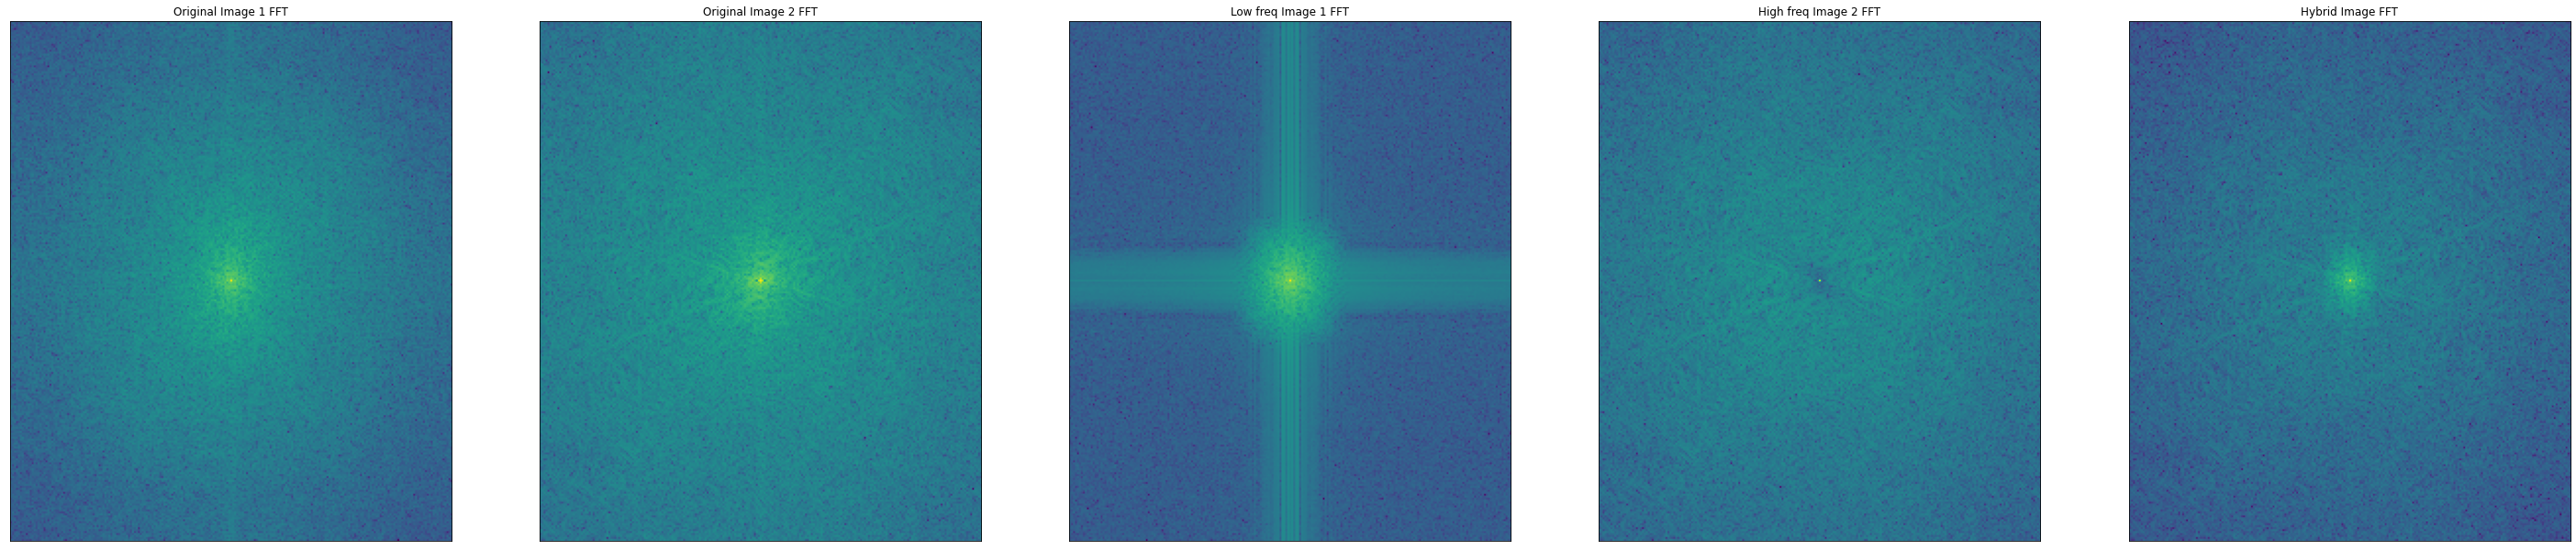

In [ ]:
"""Secondly, also visualize log magnitude of Fourier Transform of the above.
HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""
# YOUR CODE HERE.
fig = plt.figure(figsize=(50, 20))

plt.subplot(151),plt.imshow(log_mag_FFT(image_1))
plt.title('Original Image 1 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(log_mag_FFT(image_2))
plt.title('Original Image 2 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(log_mag_FFT(blurred_image1))
plt.title('Low freq Image 1 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(log_mag_FFT(normalize_img(high_frequencies_img2,255,0)))
plt.title('High freq Image 2 FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(log_mag_FFT(hybrid_image))
plt.title('Hybrid Image FFT'), plt.xticks([]), plt.yticks([])
plt.show()

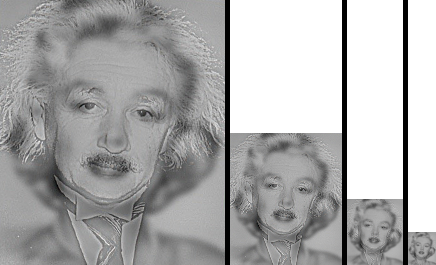

In [ ]:
"""Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
Lastly, save all your outputs."""
# YOUR CODE HERE.
# hybrid_vis = np.reshape(hybrid_image, (hybrid_image.shape[0], hybrid_image.shape[1], 1))
# print(hybrid_vis.shape)
cv2_imshow(vis_hybrid_image(hybrid_image))

Let's take pair 3 where I have used low pass components from Marilyn's image (referred to as image 1) and high pass components from Einstein's image (referred to as image 2) to form the hybrid image. When using a Gaussian blur on image 1 we can see from its Fourier transform that the amount of lower frequencies present in the image increases (The graph becomes more concentrated towards the center which is lower frequency region). When subtracting a Gaussian blurred image from the actual image in image 2, we are basically removing the lower frequencies from image 2, which can be seen in its Fourier transform that the inensity at the lower frequencies are not high anymore and rather dispersed along the regions of higher frequencies. Finally when combining the low frequencies from image 1 with the high frequencies from image 2, we see a proportion of the low frequencies being restored, which makes the fourier transform of the hybrid image similar to that of the Fourier transforms of the untouched images. At higher resolutions of the image where it is rather sharp, the higher frequency component of the hybrid image dominate and Einstein's image is perceptible to bare eyes. At lower resolutions of the image, the higher frequencies get supressed and we can perceive Marilyn's image (lower resolution can be perceived by looking at the lower size images in vis_hybrid_image function output. The other way of perceiving it is either by removing spectacles hence blurring the vision, or looking at the hybrid image with partially closed eyes) 

